# UN Data Analysis #

### Import Library

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Formatting

In [105]:
%matplotlib inline

### Get Started

In [106]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
internet_df = pd.read_csv('../data/internet_use.csv')

In [107]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [109]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [110]:
gdp_df.shape

(6729, 4)

In [111]:
internet_df.shape

(4495, 4)

In [157]:
gdp_df.dtypes 

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [113]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [114]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [115]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the Footnotes Column

In [116]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [117]:
internet_df = internet_df.drop(columns=["Value Footnotes"])

In [118]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})

In [119]:
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})

In [120]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [121]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [122]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer')

In [123]:
gdp_and_internet_use_subset = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

In [124]:
gdp_and_internet_use_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [162]:
gdp_net_2004 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2004]
gdp_net_2009 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2009]
gdp_net_2014 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2014]

Which country had the highest percentage of internet users in 2014? What was the percentage?

In [163]:
print(gdp_net_2014['Internet_Users_Pct'].max())
ind = gdp_net_2014["Internet_Users_Pct"].idxmax()
print(ind)  ##Takes two steps to make the process clear
gdp_net_2014.at[2581, "Country"]

98.16
2581


'Iceland'

Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [165]:
print(gdp_net_2014['Internet_Users_Pct'].min())
ind = gdp_net_2014["Internet_Users_Pct"].idxmin()
print(ind)  ##Takes two steps to make the process clear
gdp_net_2014.at[6940, "Country"]

0.0
6940


"Dem. People's Rep. of Korea"

Repeat for 2004 and 2009.

In [173]:
print("Maxes\n")
print(gdp_net_2009['Internet_Users_Pct'].max())
print(gdp_net_2009.at[gdp_net_2009["Internet_Users_Pct"].idxmax(), "Country"])  ##Single step
print(gdp_net_2004['Internet_Users_Pct'].max())
print(gdp_net_2004.at[gdp_net_2004["Internet_Users_Pct"].idxmax(), "Country"] + "\n")
print("Mins\n")
print(gdp_net_2009['Internet_Users_Pct'].min())
print(gdp_net_2009.at[gdp_net_2009["Internet_Users_Pct"].idxmin(), "Country"])
print(gdp_net_2004['Internet_Users_Pct'].min())
print(gdp_net_2004.at[gdp_net_2004["Internet_Users_Pct"].idxmin(), "Country"])

Maxes

93.0
Iceland
83.89
Sweden

Mins

0.0
Dem. People's Rep. of Korea
0.0
Dem. People's Rep. of Korea


Which country had the highest gdp per capita in 2014? What was the gdp per capita?
Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [176]:
print(round(gdp_net_2014["GDP_Per_Capita"].max(), 2))
print(gdp_net_2014.at[gdp_net_2014["GDP_Per_Capita"].idxmax(), "Country"])  ##Single step
print(round(gdp_net_2014["GDP_Per_Capita"].min(), 2))
print(gdp_net_2014.at[gdp_net_2014["GDP_Per_Capita"].idxmin(), "Country"])

130439.11
Macao SAR, China
672.68
Central African Republic


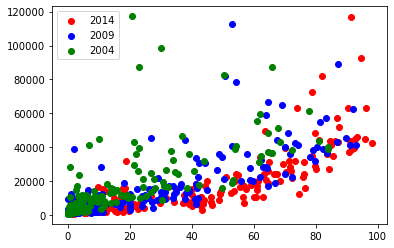

In [181]:
fig, ax = plt.subplots()
ax.scatter(gdp_net_2014["Internet_Users_Pct"], gdp_net_2014["GDP_Per_Capita"], c='red', label='2014')
ax.scatter(gdp_net_2009["Internet_Users_Pct"], gdp_net_2009["GDP_Per_Capita"], c='blue', label='2009')
ax.scatter(gdp_net_2004["Internet_Users_Pct"], gdp_net_2004["GDP_Per_Capita"], c='green', label='2004')
ax.legend()

Relationship between the variables seems similar over time with the Percentage of Internet Use increasing steadily, and GDP per capita increasing, but more gradually. Each data series is unimodal for each year.

What are the top 5 countries in terms of internet use in 2014?

In [182]:
internet_df_2014 = internet_df[internet_df["Year"] == 2014]
internet_df_2014.sort_values(by="Internet_Users_Pct", ascending=False).head()

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90


Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [187]:
##Question asks to use combined dataframe (presumably the one that also has GDP), but then asks only to graph internet use. 
##While it is not strictly correct, this solution provides a full and correct graph, so I opted for this.

top_5_internet = internet_df[internet_df["Country"].isin(["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"])]
top_5_internet[top_5_internet['Year'].isin([2004, 2009, 2014])]
top_5_internet.shape

(115, 3)

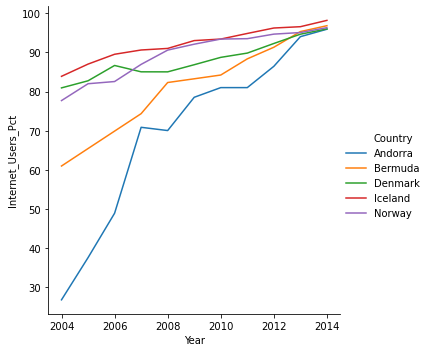

In [131]:
top_5_internet = top_5_internet[top_5_internet["Year"] > 2003]
sns.relplot(data=top_5_internet, x="Year", y="Internet_Users_Pct", kind="line", hue="Country")

In [183]:
internet_df_2014 = internet_df[internet_df["Year"] == 2014]
internet_df_2014.sort_values(by="Internet_Users_Pct", ascending=True).head()

,Country,Year,Internet_Users_Pct
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
4019,Timor-Leste,2014,1.14
623,Burundi,2014,1.38
3648,Somalia,2014,1.63


In [133]:
bottom_5_internet = internet_df[internet_df["Country"].isin(["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste", "Burundi", "Somalia"])]
bottom_5_internet.shape

(112, 3)

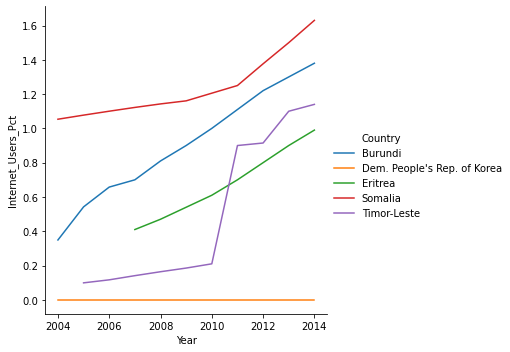

In [134]:
bottom_5_internet = bottom_5_internet[bottom_5_internet["Year"] > 2003]
sns.relplot(data=bottom_5_internet, x="Year", y="Internet_Users_Pct", kind="line", hue="Country")

In [184]:
gdp_df_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_df_2014.sort_values(by="GDP_Per_Capita", ascending=False).head()

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [136]:
top_5_gdp = gdp_df[gdp_df["Country"].isin(["Macao SAR, China", "Qatar", "Luxembourg", "Singapore", "Brunei"])]

(135, 3)

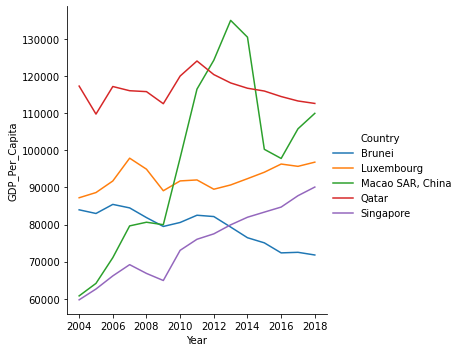

In [137]:
top_5_gdp = top_5_gdp[top_5_gdp["Year"] > 2003]
sns.relplot(data=top_5_gdp, x="Year", y="GDP_Per_Capita", kind="line", hue="Country")

In [185]:
gdp_df_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_df_2014.sort_values(by="GDP_Per_Capita", ascending=True).head()

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


In [139]:
bottom_5_gdp = gdp_df[gdp_df["Country"].isin(["Central African Republic", "Burundi", "Dem. Rep. Congo", "Niger", "Malawi"])]

(145, 3)

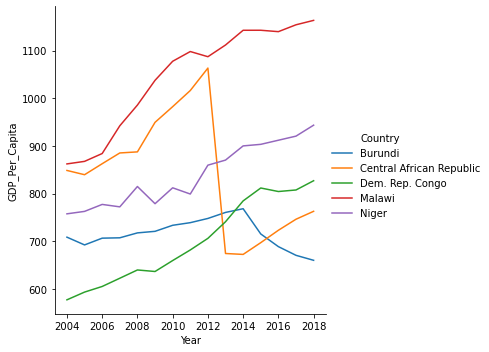

In [140]:
bottom_5_gdp = bottom_5_gdp[bottom_5_gdp["Year"] > 2003]
sns.relplot(data=bottom_5_gdp, x="Year", y="GDP_Per_Capita", kind="line", hue="Country")

In [141]:
by_df = pd.read_csv('../data/bananayield.csv')

In [142]:
by_df_updt = by_df.rename(columns={"Country or Area": "Country", "Value": "Banana_Yield"})
by_df_updt.head()

,Country,Element,Year,Banana_Yield
0,Africa,Yield,2014,109132
1,Africa,Yield,2013,109062
2,Africa,Yield,2012,102077
3,Africa,Yield,2011,96259
4,Africa,Yield,2010,99749


In [143]:
three_var_df = pd.merge(gdp_and_internet_use_subset, by_df_updt)

three_var_df.shape
three_var_df.head(100)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Element,Banana_Yield
0,Algeria,2014,13557.769757,18.090000,Yield,252446
1,Algeria,2009,12697.690780,11.230000,Yield,153779
2,Algeria,2004,11845.170512,4.634475,Yield,267143
3,Angola,2014,6813.052106,21.260000,Yield,274359
4,Angola,2009,6292.534856,6.000000,Yield,186627
...,...,...,...,...,...,...
95,European Union,2004,32415.974900,NaN,Yield,405397
96,Fiji,2014,8405.905166,41.800000,Yield,48873
97,Fiji,2009,7193.903810,17.000000,Yield,62176
98,Fiji,2004,7410.835385,7.412943,Yield,70000


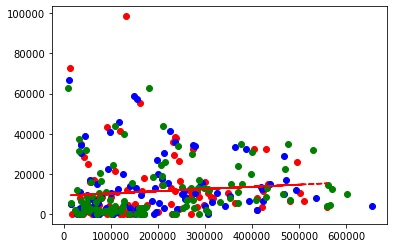

In [153]:
three_var_2004 = three_var_df[three_var_df['Year'] == 2004]
three_var_2009 = three_var_df[three_var_df['Year'] == 2009]
three_var_2014 = three_var_df[three_var_df['Year'] == 2014]
three_var_2004 = three_var_2004.fillna(0)
three_var_2009 = three_var_2009.fillna(0)
three_var_2014 = three_var_2014.fillna(0)
plt.scatter(three_var_2004["Banana_Yield"], three_var_2004["GDP_Per_Capita"], color='red')
plt.scatter(three_var_2009["Banana_Yield"], three_var_2009["GDP_Per_Capita"], color='blue')
plt.scatter(three_var_2014["Banana_Yield"], three_var_2014["GDP_Per_Capita"], color='green')
z = np.polyfit(three_var_2004["Banana_Yield"], three_var_2004["GDP_Per_Capita"], 1)
p = np.poly1d(z)
plt.plot(three_var_2004["Banana_Yield"],p(three_var_2004["Banana_Yield"]),"r--")

Comparing Banana Yield to Per Capita GDP

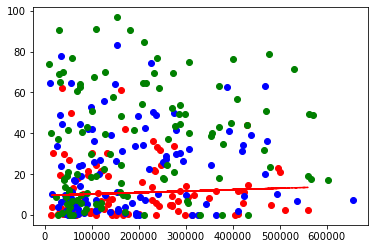

In [154]:
plt.scatter(three_var_2004["Banana_Yield"], three_var_2004["Internet_Users_Pct"], color='red')
plt.scatter(three_var_2009["Banana_Yield"], three_var_2009["Internet_Users_Pct"], color='blue')
plt.scatter(three_var_2014["Banana_Yield"], three_var_2014["Internet_Users_Pct"], color='green')
z = np.polyfit(three_var_2004["Banana_Yield"], three_var_2004["Internet_Users_Pct"], 1)
p = np.poly1d(z)
plt.plot(three_var_2004["Banana_Yield"],p(three_var_2004["Banana_Yield"]),"r--")

Comparing Banana Yield to Internet Usage